In [1]:
import json
import pandas as pd
from IPython.display import display, Image

from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import classification_report

In [2]:
from lib.Sequential import Sequential
from lib.Layer import Dense

In [3]:
# Load dataset iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = pd.Series(iris.target)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
df['target'].value_counts()

target
0    50
1    50
2    50
Name: count, dtype: int64

In [5]:
# Melakukan splitting data train dan validation
X_train, X_val, y_train, y_val = train_test_split(df[iris.feature_names], df['target'], test_size=0.3, random_state=42, stratify=df['target'])

In [6]:
print(X_train.shape, X_val.shape, y_train.shape, y_val.shape)

(105, 4) (45, 4) (105,) (45,)


In [7]:
# Membangun model ANN
model = Sequential()
model.add(Dense(4, activation='sigmoid', input_shape=(X_train.shape[1],)))
model.add(Dense(6, activation='sigmoid', input_shape=(4,)))
model.add(Dense(3, activation='linear', input_shape=(6,)))

In [8]:
# Fit model, menjalankan 1000 epochs
model.fit(X_train, y_train, epochs=1000, batch_size=4, learning_rate=0.1, error_threshold=0.3, random_state=42, verbose=True)

Epoch 1/1000
105/105 [==============================] - loss: 3.7181 - time: 0.0041 s
Epoch 2/1000
105/105 [==============================] - loss: 2.8106 - time: 0.0034 s
Epoch 3/1000
105/105 [==============================] - loss: 2.1834 - time: 0.0030 s
Epoch 4/1000
105/105 [==============================] - loss: 1.7839 - time: 0.0040 s
Epoch 5/1000
105/105 [==============================] - loss: 1.6854 - time: 0.0030 s
Epoch 6/1000
105/105 [==============================] - loss: 1.6568 - time: 0.0020 s
Epoch 7/1000
105/105 [==============================] - loss: 1.6370 - time: 0.0020 s
Epoch 8/1000
105/105 [==============================] - loss: 1.6177 - time: 0.0030 s
Epoch 9/1000
105/105 [==============================] - loss: 1.5968 - time: 0.0020 s
Epoch 10/1000
105/105 [==============================] - loss: 1.5736 - time: 0.0030 s
Epoch 11/1000
105/105 [==============================] - loss: 1.5472 - time: 0.0030 s
Epoch 12/1000
105/105 [=============================

In [9]:
model.summary()

 Model: "sequential"
-----------------------------------------------
 Layer (type)        Output Shape       Param #
 dense (Dense)       (None, 4)          20     
 dense (Dense)       (None, 6)          30     
 dense (Dense)       (None, 3)          15     
Total params: 65


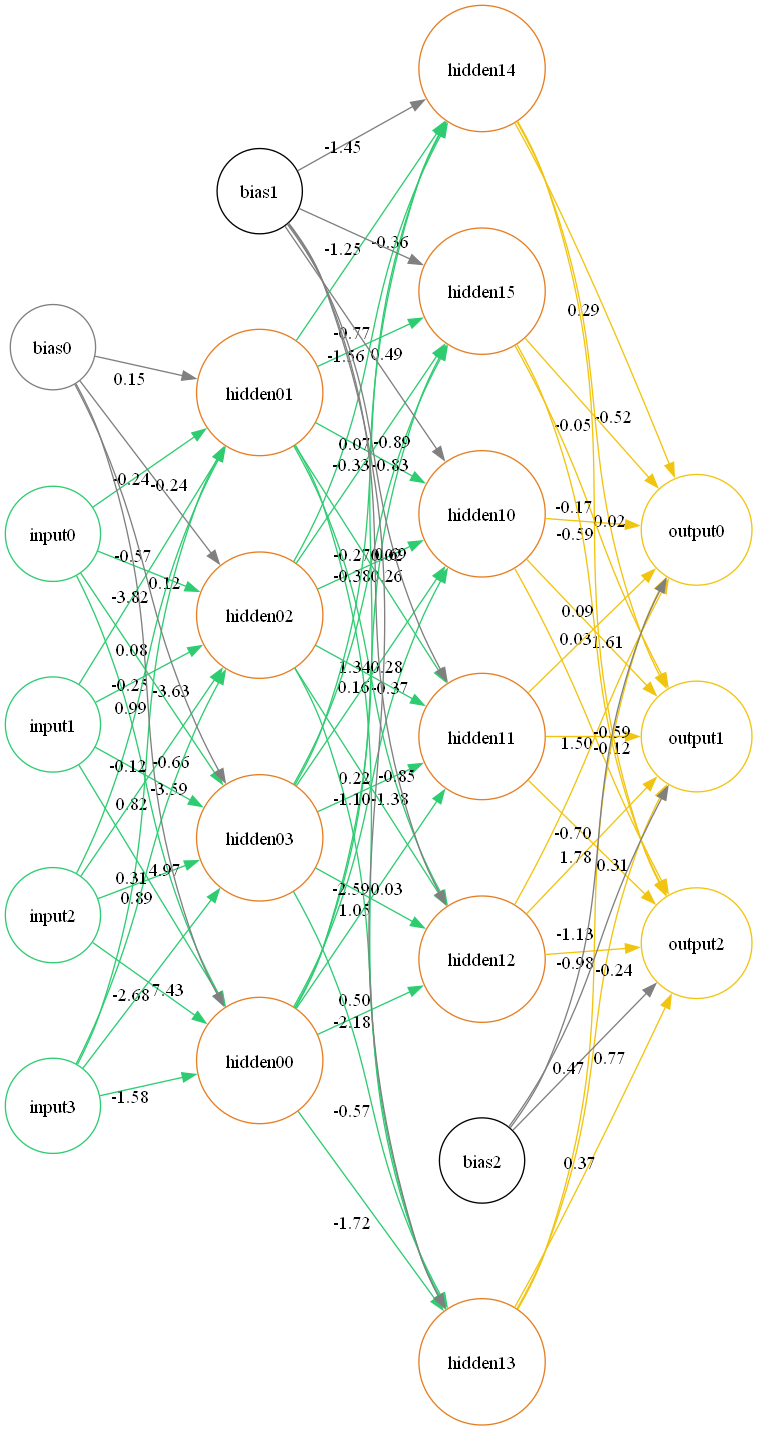

In [10]:
# Melakukan visualisasi model struktur jaringan
model.visualize()

# Mengambil gambar hasil visualisasi model untuk ditampilkan
image_path = "output/ffnn_graph.png"
display(Image(filename=image_path))

In [11]:
# Melakukan prediksi dan melihat hasil prediksi
y_pred = model.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.94      1.00      0.97        15
           2       1.00      0.93      0.97        15

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [12]:
# Menyimpan model yang telah dibuat dalam json
model.save("iris_model")